# SEIR Model with vaccine compartment in second model (10% Actual Risk Reduction)

## Define libs

In [1]:
from scipy import integrate
from matplotlib.pyplot import *
import statsmodels.api as sm
import numpy

## Define global model parameters

In [2]:
days = 30
points = 100

n = 999
n_i = 1

p_exposure = 0.05
arr = 0.10
p_symptomatic = 0.10
rate_recovered = 0.98
p_death = 0.02

## Define unvaccinated vector field to integrate over states

In [3]:
beta = p_exposure
mu = p_symptomatic
sigma = rate_recovered
phi = p_death

 
def vector_field(x,t):
    S = x[0]
    E = x[1]
    I = x[2]
    R = x[3]
    D = x[4]

    return numpy.array([(-beta*S*I),(beta*S*I)-(mu)*E,(mu*E)-(sigma+phi)*I,sigma*I,phi*I])

In [4]:
S0 = n
E0 = 0
I0 = n_i
R0 = 0
D0 = 0
x0 = numpy.array([S0,E0,I0,R0,D0])

t = numpy.linspace(0,days,points)
x = integrate.odeint(vector_field,x0,t)

## Define vaccinated vector field compartment model (extra compartment)

In [5]:
beta_v = p_exposure
vega_v = arr
mu_v = p_symptomatic
sigma_v = rate_recovered
phi_v = p_death

 
def vector_field_v(x_v,t):
    S_v = x_v[0]
    E_v = x_v[1]
    I_v = x_v[2]
    R_v = x_v[3]
    D_v = x_v[4]
    R2_v = x_v[5]

    return numpy.array([(-beta_v*S_v*I_v),(beta_v*S_v*I_v)-(mu_v+vega_v)*E_v,(mu_v*E_v)-(sigma_v+phi_v)*I_v,sigma_v*I_v,phi_v*I_v,vega_v*E_v])

In [6]:
S0_v = n
E0_v = 0
I0_v = n_i
R0_v = 0
R20_v = 0
D0_v = 0
x0_v = numpy.array([S0_v,E0_v,I0_v,R0_v,D0_v,R20_v])

 
t_v = numpy.linspace(0,days,points)
x_v = integrate.odeint(vector_field_v, x0_v, t_v)

In [9]:
rcParams["figure.figsize"] = (20,20)

## Plot the outputs and put difference between max infection points in Sup.title

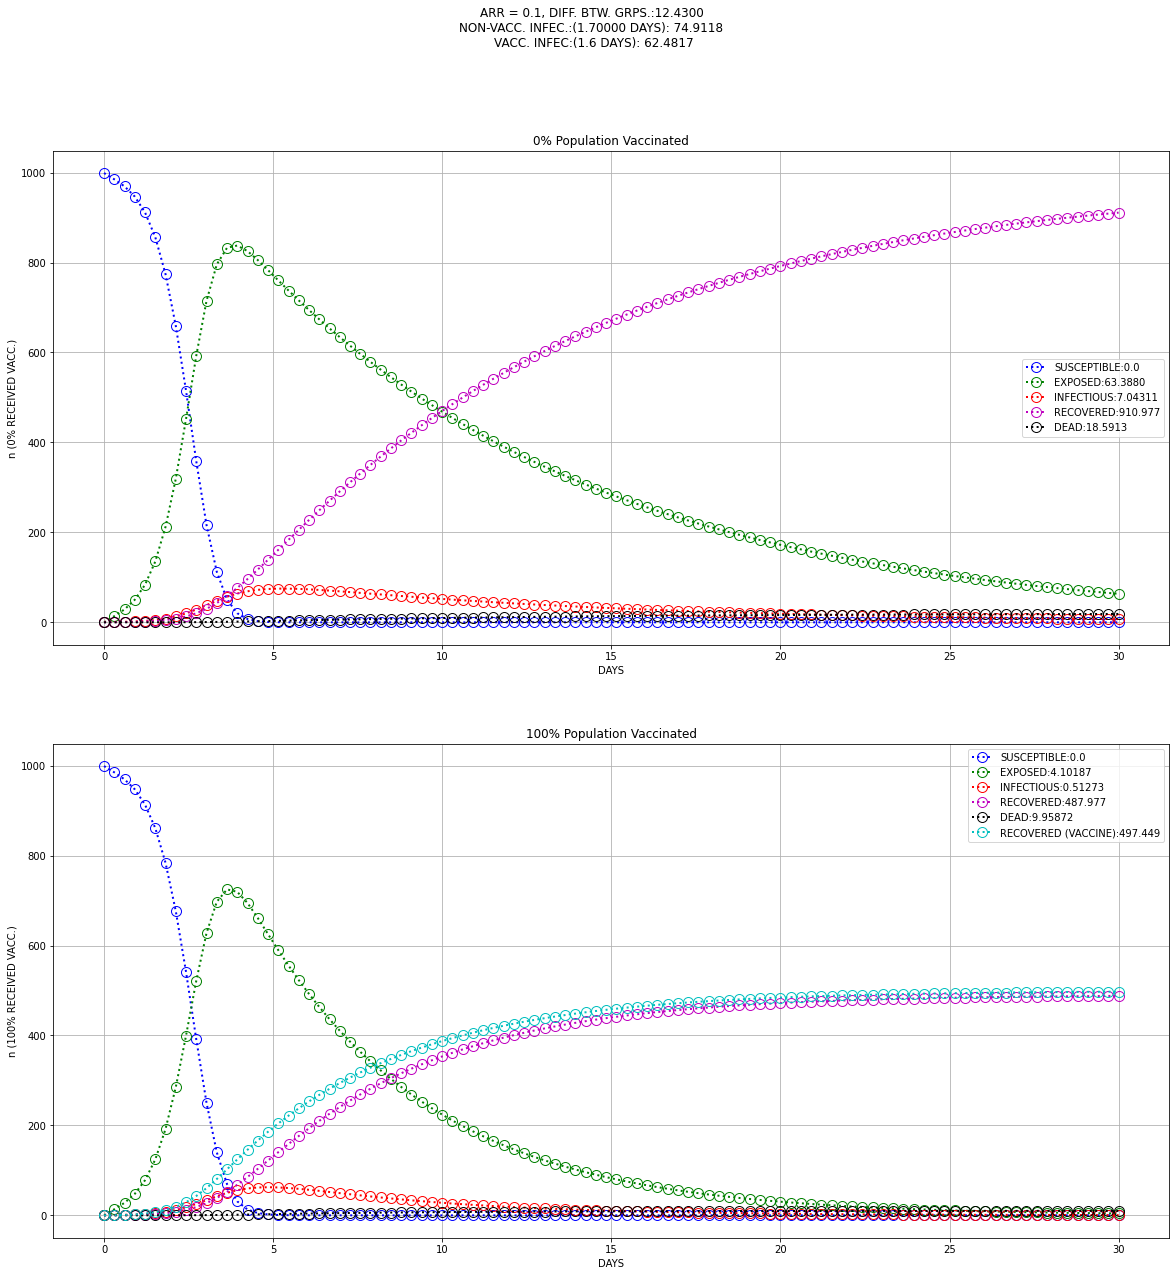

In [10]:
am = numpy.argmax(x[:,2])
am_v = numpy.argmax(x_v[:,2])


fig=figure()
fig.suptitle("ARR = %3.7s, DIFF. BTW. GRPS.:%3.7s \nNON-VACC. INFEC.:(%3.7s DAYS): %3.7s \nVACC. INFEC:(%3.7s DAYS): %3.7s"%(arr,x[am,2]-x_v[am_v,2],am*0.1,x[am,2],am_v*0.1,x_v[am_v,2]))

subplot(2,1,1)
grid()
title("0% Population Vaccinated")
plot(t, x[:,0], 'bo:', linewidth=2,markerfacecolor='none',ms=10)
plot(t, x[:,1], 'go:', linewidth=2,markerfacecolor='none',ms=10)
plot(t, x[:,2], 'ro:', linewidth=2,markerfacecolor='none',ms=10)
plot(t, x[:,3], 'mo:', linewidth=2,markerfacecolor='none',ms=10)
plot(t, x[:,4], 'ko:', linewidth=2,markerfacecolor='none',ms=10)
xlabel("DAYS")
ylabel("n (0% RECEIVED VACC.)")
legend(["SUSCEPTIBLE:%3.7s"%(0.000),"EXPOSED:%3.7s"%(x[points-1,1]),"INFECTIOUS:%3.7s"%(x[points-1,2]),"RECOVERED:%3.7s"%(x[points-1,3]),"DEAD:%3.7s"%(x[points-1,4])])

subplot(2,1,2)
grid()
title("100% Population Vaccinated")
plot(t, x_v[:,0], 'bo:', linewidth=2,markerfacecolor='none',ms=10)
plot(t, x_v[:,1], 'go:', linewidth=2,markerfacecolor='none',ms=10)
plot(t, x_v[:,2], 'ro:', linewidth=2,markerfacecolor='none',ms=10)
plot(t, x_v[:,3], 'mo:', linewidth=2,markerfacecolor='none',ms=10)
plot(t, x_v[:,4], 'ko:', linewidth=2,markerfacecolor='none',ms=10)
plot(t, x_v[:,5], 'co:', linewidth=2,markerfacecolor='none',ms=10)
xlabel("DAYS")
ylabel("n (100% RECEIVED VACC.)")
legend(["SUSCEPTIBLE:%3.7s"%(0.000),"EXPOSED:%3.7s"%(x_v[points-1,1]),"INFECTIOUS:%3.7s"%(x_v[points-1,2]),"RECOVERED:%3.7s"%(x_v[points-1,3]),"DEAD:%3.7s"%(x_v[points-1,4]),"RECOVERED (VACCINE):%3.7s"%(x_v[points-1,5])])

show()